# House prices: Advanced Regression Techniques

This is my code for (this Kaggle competition)[https://www.kaggle.com/c/house-prices-advanced-regression-techniques]

## Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
from fastai.column_data import *


In [3]:
# With this line all the columns will be displayed
pd.options.display.max_columns = None

In [4]:
PATH = os.path.join('data')

## Loading data

In [5]:
train_df = pd.read_csv(os.path.join(PATH, "train.csv"))
test_df = pd.read_csv(os.path.join(PATH, "test.csv"))

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
DataFrameSummary(train_df).summary()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,NaN,1201,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460,1460,1460,1460,NaN,NaN,NaN,NaN,NaN,1452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460,NaN,1460,1460,1460,NaN,NaN,NaN,NaN,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,NaN,1460,NaN,1460,NaN,NaN,1379,NaN,1460,1460,NaN,NaN,NaN,1460,1460,1460,1460,1460,1460,NaN,NaN,NaN,1460,1460,1460,NaN,NaN,1460
mean,730.5,56.8973,NaN,70.05,10516.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.09932,5.57534,1971.27,1984.87,NaN,NaN,NaN,NaN,NaN,103.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.64,NaN,46.5493,567.24,1057.43,NaN,NaN,NaN,NaN,1162.63,346.992,5.84452,1515.46,0.425342,0.0575342,1.56507,0.382877,2.86644,1.04658,NaN,6.51781,NaN,0.613014,NaN,NaN,1978.51,NaN,1.76712,472.98,NaN,NaN,NaN,94.2445,46.6603,21.9541,3.40959,15.061,2.7589,NaN,NaN,NaN,43.489,6.32192,2007.82,NaN,NaN,180921
std,421.61,42.3006,NaN,24.2848,9981.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383,1.1128,30.2029,20.6454,NaN,NaN,NaN,NaN,NaN,181.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098,NaN,161.319,441.867,438.705,NaN,NaN,NaN,NaN,386.588,436.528,48.6231,525.48,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.62539,NaN,0.644666,NaN,NaN,24.6897,NaN,0.747315,213.805,NaN,NaN,NaN,125.339,66.256,61.1191,29.3173,55.7574,40.1773,NaN,NaN,NaN,496.123,2.70363,1.3281,NaN,NaN,79442.5
min,1,20,NaN,21,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1872,1950,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,334,0,0,334,0,0,0,0,0,0,NaN,2,NaN,0,NaN,NaN,1900,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,NaN,NaN,34900
25%,365.75,20,NaN,59,7553.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1954,1967,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,223,795.75,NaN,NaN,NaN,NaN,882,0,0,1129.5,0,0,1,0,2,1,NaN,5,NaN,0,NaN,NaN,1961,NaN,1,334.5,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,NaN,NaN,129975
50%,730.5,50,NaN,69,9478.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,1973,1994,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.5,NaN,0,477.5,991.5,NaN,NaN,NaN,NaN,1087,0,0,1464,0,0,2,0,3,1,NaN,6,NaN,1,NaN,NaN,1980,NaN,2,480,NaN,NaN,NaN,0,25,0,0,0,0,NaN,NaN,NaN,0,6,2008,NaN,NaN,163000
75%,1095.25,70,NaN,80,11601.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,2000,2004,NaN,NaN,NaN,NaN,NaN,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.25,NaN,0,808,1298.25,NaN,NaN,NaN,NaN,1391.25,728,0,1776.75,1,0,2,1,3,1,NaN,7,NaN,1,NaN,NaN,2002,NaN,2,576,NaN,NaN,NaN,168,68,0,0,0,0,NaN,NaN,NaN,0,8,2009,NaN,NaN,214000
max,1460,190,NaN,313,215245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,9,2010,2010,NaN,NaN,NaN,NaN,NaN,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5644,NaN,1474,2336,6110,NaN,NaN,NaN,NaN,4692,2065,572,5642,3,2,3,2,8,3,NaN,14,NaN,3,NaN,NaN,2010,NaN,4,1418,NaN,NaN,NaN,857,547,552,508,480,738,NaN,NaN,NaN,15500,12,2010,NaN,NaN,755000
counts,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,137

In [8]:
(len(train_df), len(test_df))

(1460, 1459)

## Feature engineering

I went through all the variables and classified them either as categorical or continuous.
I decided not to include some of them for the following reasons:
- "Alley": it has 93.77% of missing values.
- "Utilities": there only one case of value different than "AllPub". It's to little data for the model to generalize.
- "MiscFeature": it has 96.30% of missing values and "MiscVal" should give the sufficient information to the model


In [9]:
columns_to_skip = ["Id", "Alley", "Utilities", "MiscFeature"]

In [10]:
categorical_variables = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour",
                         "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2",
                        "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", 
                         "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
                         "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                        "Heating",  "HeatingQC", "CentralAir", "Electrical", "KitchenQual", 
                         "Functional", "Fireplaces", "FireplaceQu", "GarageType", "GarageFinish",
                        "GarageCars", "GarageQual", "GarageCond", "PavedDrive", "PoolQC",
                        "Fence", "MoSold", "YrSold", "SaleType", "SaleCondition", "BsmtHalfBath",
                        "BsmtFullBath"]
continuous_variables = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", 
                        "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
                       "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
                        "FullBath","HalfBath","BedroomAbvGr",
                       "KitchenAbvGr", "TotRmsAbvGrd", "GarageYrBlt", "GarageArea",
                       "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                        "ScreenPorch", "PoolArea", "MiscVal"]

have_missing = ["LotFrontage", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
                "BsmtFinType2", "FireplaceQu", "GarageYrBlt", "GarageQual", "GarageCond",
               "PoolQC", "BsmtUnfSF", 'BsmtFinSF1', 'GarageArea', 'BsmtHalfBath', 'BsmtFinSF2',
                'TotalBsmtSF', 'BsmtFullBath', 'MasVnrArea']

In [11]:
# Filling in missing values
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(0)
train_df["BsmtQual"] = train_df["BsmtQual"].fillna("NA")
train_df["BsmtCond"] = train_df["BsmtCond"].fillna("NA")
train_df["BsmtExposure"] = train_df["BsmtExposure"].fillna("NA")
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].fillna("NA")
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].fillna("NA")
train_df["FireplaceQu"] = train_df["FireplaceQu"].fillna("NA")
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(1800)
train_df["GarageQual"] = train_df["GarageQual"].fillna("NA")
train_df["GarageCond"] = train_df["GarageCond"].fillna("NA")
train_df["BsmtUnfSF"] = train_df["BsmtUnfSF"].fillna(-1)
train_df["BsmtFinSF1"] = train_df["BsmtFinSF1"].fillna(-1)
train_df["BsmtFinSF2"] = train_df["BsmtFinSF2"].fillna(-1)
train_df["GarageArea"] = train_df["GarageArea"].fillna(-1)
train_df["BsmtHalfBath"] = train_df["BsmtHalfBath"].fillna("NA")
train_df["TotalBsmtSF"] = train_df["TotalBsmtSF"].fillna(-1)
train_df["BsmtFullBath"] = train_df["BsmtFullBath"].fillna("NA")
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(-1)

In [12]:
# Filling in missing values
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(0)
test_df["BsmtQual"] = test_df["BsmtQual"].fillna("NA")
test_df["BsmtCond"] = test_df["BsmtCond"].fillna("NA")
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna("NA")
test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna("NA")
test_df["BsmtFinType2"] = test_df["BsmtFinType2"].fillna("NA")
test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("NA")
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(1800)
test_df["GarageQual"] = test_df["GarageQual"].fillna("NA")
test_df["GarageCond"] = test_df["GarageCond"].fillna("NA")
test_df["BsmtUnfSF"] = test_df["BsmtUnfSF"].fillna(-1)
test_df["BsmtFinSF1"] = test_df["BsmtFinSF1"].fillna(-1)
test_df["BsmtFinSF2"] = test_df["BsmtFinSF2"].fillna(-1)
test_df["GarageArea"] = test_df["GarageArea"].fillna(-1)
test_df["BsmtHalfBath"] = test_df["BsmtHalfBath"].fillna("NA")
test_df["TotalBsmtSF"] = test_df["TotalBsmtSF"].fillna(-1)
test_df["BsmtFullBath"] = test_df["BsmtFullBath"].fillna("NA")
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(-1)

In [13]:
for variable in categorical_variables: train_df[variable] = train_df[variable].astype('category').cat.as_ordered()
    
for variable in categorical_variables: test_df[variable] = test_df[variable].astype('category').cat.as_ordered()

In [14]:
for variable in continuous_variables:
    train_df[variable] = train_df[variable].astype('float32')
    test_df[variable] = test_df[variable].astype('float32')


In [15]:
dl_train_df, y, nas, mapper = proc_df(train_df, 'SalePrice', do_scale=True, skip_flds=columns_to_skip)
y_log = np.log(y)

In [16]:
nas

{}

In [17]:
test_df['SalePrice'] = 0
dl_test_df, _, nas, mapper = proc_df(test_df, 'SalePrice', do_scale=True, skip_flds=columns_to_skip, mapper=mapper, na_dict=nas)


In [19]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(len(test_df) * train_ratio); train_size
val_idx = list(range(train_size, len(dl_train_df)))


## Learning model

### Creating model

In [20]:
def rsme(y_pred, target):
    return np.mean((y_pred-target)**2)

In [21]:
max_log_y = np.max(y_log)
y_range = (0, max_log_y*1.2)

In [22]:
#Since the dataset is small, I've chosen to use small batch size.
batch_size=4

In [23]:
model = ColumnarModelData.from_data_frame(PATH, val_idx, dl_train_df, y_log.astype(np.float32), cat_flds=categorical_variables, test_df=dl_test_df, bs=batch_size)

In [25]:
categories_sizes = [(c, len(train_df[c].cat.categories)+1) for c in categorical_variables]

In [26]:
embedding_sizes = [(c, min(50, (c+1)//2)) for _,c in categories_sizes]

In [27]:
model_learner = model.get_learner(embedding_sizes, len(dl_train_df.columns)-len(categorical_variables),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 69%|██████▊   | 188/274 [00:04<00:02, 40.75it/s, loss=8.59]


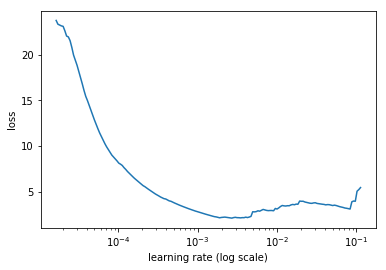

In [28]:
model_learner.lr_find()
model_learner.sched.plot()

In [29]:
learning_rate = 1e-4

### Learning model

In [30]:
model_learner.fit(learning_rate, 10, metrics=[rsme])

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[0.      0.27432 0.25011 0.25011]                            
[1.      0.26608 0.19495 0.19495]                            
[2.      0.14087 0.15237 0.15237]                            
[3.      0.14518 0.14241 0.14241]                            
[4.      0.10741 0.14361 0.14361]                             
[5.      0.24042 0.18457 0.18457]                             
[6.      0.16233 0.12883 0.12883]                            
[7.      0.17436 0.14356 0.14356]                             
[8.      0.09611 0.09903 0.09903]                             
[9.      0.18898 0.08847 0.08847]                             



In [32]:
# test_log_predictions, _ = model_learner.predict(is_test=False)
x,y=model_learner.predict_with_targs()


In [31]:
pred_test=model_learner.predict(is_test=True)

RuntimeError: index out of range at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/generic/THTensorMath.c:277